In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os,sys

In [31]:
imageName = "Bird.jpg"
image = cv2.imread(imageName, cv2.IMREAD_COLOR)


if image is None:
    print("Could not open or find the image")
    sys.exit()
    
kernel1 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

kernel2 = np.array([[-0.125, -0.125, -0.125, -0.125, -0.125],
                    [-0.125, 0.25, 0.25, 0.25, -0.125],
                    [-0.125, 0.25, 1.0, 0.25, -0.125],
                    [-0.125, 0.25, 0.25, 0.25, -0.125],
                    [-0.125, -0.125, -0.125, -0.125, -0.125]])

kernel3 = np.array([[0.04, 0.04, 0.04],[0.04, 0.04, 0.04],[0.04, 0.04, 0.04]])

kernel4 = np.array([[-1, -1, 0],[-1, 0, 1],[0, 1, 1]])

print(kernel1)
print(kernel2)
print(kernel3)
print(kernel4)

result = cv2.filter2D(image,ddepth=-1, kernel=kernel3,
                     anchor=(-1,-1), delta=0,
                     borderType=cv2.BORDER_DEFAULT)
# print(result)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
[[-0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125  0.25   0.25   0.25  -0.125]
 [-0.125  0.25   1.     0.25  -0.125]
 [-0.125  0.25   0.25   0.25  -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125]]
[[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]
[[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]]


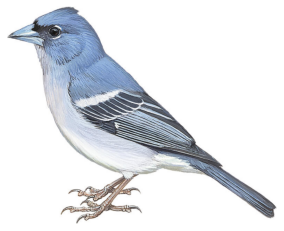

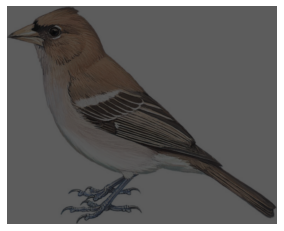

In [32]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

plt.imshow(result)
plt.axis('off')
plt.show()

In [9]:
import tensorflow as tf
import numpy as np
import datetime,os

from tensorflow.keras.models import load_model,Model
from tensorflow.keras import datasets, models, callbacks, metrics
import matplotlib.pyplot as plt

In [3]:
(train_image, train_label), (test_images, test_labels) = datasets.cifar10.load_data()

num_train = int(round(len(train_image)*0.8))
train_images, valid_images = train_image[:num_train], train_image[num_train:]
train_labels, valid_labels = train_label[:num_train], train_label[num_train:]

train_images, valid_images, test_images = train_images / 255.0, valid_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 708s 4us/step


In [4]:
print("training dataset   :" + str(len(train_images)))
print("validation dataset :" + str(len(valid_images)))
print("test dataset       :" + str(len(test_images)))

training dataset   :40000
validation dataset :10000
test dataset       :10000


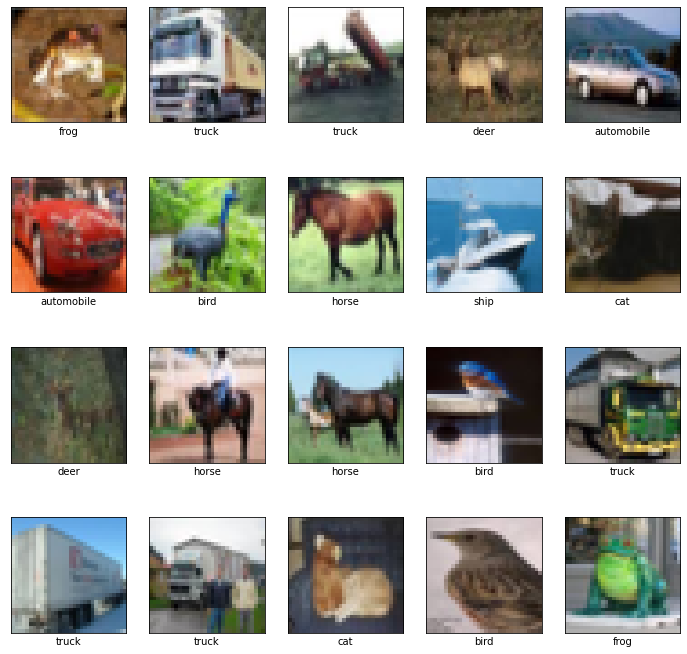

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [19]:
from tensorflow.keras import layers, datasets, callbacks, metrics, models
from tensorflow.keras.models import load_model, Model

In [21]:
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

model = Model(inputs, outputs, name='model_1')

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0   

In [39]:

layers.Conv2D(64, (3, 3), strides=(1, 1), padding='valid',
activation=None)

layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')

In [24]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [50]:
model_TensorBoard = callbacks.TensorBoard(logdir)
model_checkpoint_callback = callbacks.ModelCheckpoint(logdir + '/cp',
                                                     monitor='val_accuracy',
                                                     save_best_only=True,
                                                     mode='max')

In [54]:
callbacks.ModelCheckpoint('\cp', monitor='val_loss', verbose=0, save_best_only=False,
save_weights_only=False, mode='auto', period=1)

In [49]:
model.compile(optimizer='SGD',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, batch_size=64,
                   validation_data=(valid_images, valid_labels),
                   callbacks=[model_TensorBoard, model_checkpoint_callback])

Epoch 1/15


ValueError: in user code:

    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\User-2154\.conda\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer Sequential is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [64, 32, 32, 3]
